<a href="https://colab.research.google.com/github/themathedges/3YP-Standalone-Kennington/blob/main/Ravi/Preprocessing_notebooks/Precipitation_Daily_Data_Processing_Ravi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Precipitation Data Exploration
Author: Ravi Kohli

Date: December 14th, 2020

College: Christ Church

Data was collected from Radcliffe Observatory:
Oxford Weather and Climate since 1767 by Stephen Burt and Tim Burt, published by Oxford University Press, 2019.

This data is available at
https://www.geog.ox.ac.uk/research/climate/rms/daily-data.html



Dataset documentation explanation of the columns: (taken from documentation)
- YYYY - Year (four digits). First record 1767
- Jan : Monthly total precipitation at the Radcliffe Observatory, Oxford. **Units millimetres and tenths.**
- Feb, Mar etc and similarly for each month of the year (will be a column for each month)
- Annual : Total annual precipitation at the Radcliffe Observatory, Oxford (sum of 12 monthly values). **Units millimetres and tenths.**
- % 1981-2010 average : Annual total as a percentage of the 1981-2010 average, calculated to 1 decimal place.
- YYYY - Year (four digits) repeated. First record 1767
- Winter - Seasonal total precipitation at the Radcliffe Observatory, Oxford. **Units millimetres and tenths**. Winter is the sum of Dec, Jan, Feb monthly totals, dated to the January year. Units millimetres and tenths. (Winter 1767 is missing as there is no monthly precipitation total for December 1766)
- Spring : ditto, for March-April-May. **Units millimetres and tenths**
- Summer : ditto, June-July-August. **Units millimetres and tenths**
- Autumn : ditto, Sept, Oct, Nov. **Units millimetres and tenths**


**NOTE:** if running this notebook on your own computer, then just ignore this cell below

In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Retrieving the precipitation data
path = '/content/drive/My Drive/3YP/data/'    # when running in a notebook in colab
#path = '../data/'                            # when running from an external notebook

filename = "daily-data-to-jan-2020.csv" # the name of the csv file
full_df = pd.read_csv(path+filename, parse_dates=[['MM','DD','YYYY']])               # converting the csv file to a dataframe

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,14,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74906 entries, 0 to 74905
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   MM_DD_YYYY                   74906 non-null  datetime64[ns]
 1   Tmax °C                      74906 non-null  float64       
 2   Tmin °C                      74906 non-null  float64       
 3   Daily Tmean °C               74906 non-null  float64       
 4   Daily range degC             74906 non-null  float64       
 5   Grass min °C                 32531 non-null  object        
 6   Air frost 0/1                74906 non-null  int64         
 7   Ground frost 0/1             32251 non-null  float64       
 8   Max ≥ 25.0°C                 74906 non-null  int64         
 9   Max ≥ 30.0°C                 74906 non-null  int64         
 10  Min ≥ 15.0 °C                74906 non-null  int64         
 11  Max < 0 °C                   74906 non-nu

In [ ]:
# just extracting the precipitation columns from the dataframe
df = full_df[['MM_DD_YYYY', 'Rainfall mm 1 dpl no traces']]

In [ ]:
df

,MM_DD_YYYY,Rainfall mm 1 dpl no traces
0,1815-01-01,NaN
1,1815-01-02,NaN
2,1815-01-03,NaN
3,1815-01-04,NaN
4,1815-01-05,NaN
...,...,...
74901,2020-01-27,2.8
74902,2020-01-28,0.0
74903,2020-01-29,0.0
74904,2020-01-30,0.0


In [ ]:
# pickle our data so it can be used in another notebook
import pickle
path = '/content/drive/My Drive/3YP/data/'
filename_real = 'daily_precipitation_data_processed'
outfile_real = open(path+filename_real, 'wb')
pickle.dump(df, outfile_real)
outfile_real.close()

# Exploratory Analysis

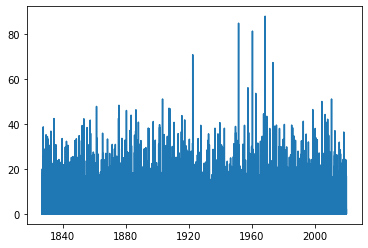

In [ ]:
plt.plot(df['MM_DD_YYYY'], df['Rainfall mm 1 dpl no traces'])

In [ ]:
# Annual Graph over time
_fig, _ax = plt.subplots(figsize = (10, 10))
_ax.plot(df['MM_DD_YYYY'], df['Rainfall mm 1 dpl no traces'], 'r', label = 'Annual Data')
#_ax.plot(exploratory_df['YYYY'], exploratory_df['SMA_Annual_20'], color = 'k', label = '20-year Moving Average')   
_ax.set(title = 'Graph of Annual Preciptation over Time', xlabel= 'Time (years)', ylabel='Precipitation (mm)')
_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : '22'}

matplotlib.rc('font', **font)